**Context**

The  objective  of  this  project  is  to  build  a  text  classification  model  that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by classification algorithm to analyse the sentiment of the customers.

**Given Data**

The  Dataset  of  50,000  movie  reviews  from  IMDB,  labelled  by sentiment  (positive/negative).  Reviews  have  been  preprocessed,  and  each  review  is encoded  as  a  sequence  of  word  indexes  (integers).  For  convenience,  the  words  are indexed  by  their  frequency  in  the  dataset,  meaning  the  for  that  has  index  1  is  the most  frequent  word.  Use  the first  20  words  from  each  review  to  speed  up  training, using  a  max  vocabulary  size  of  10,000.  As  a  convention,  "0"  does  not  stand  for  a specific word, but instead is used to encode any unknown word

**Objective**

Build  a  sequential  NLP  classifier  which  can  use  input  text parameters to determine the customer sentiments.











Importing The Necessary Libraries

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from keras import models
from keras import layers

Loading The Data Set

In [3]:
from keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
data = np.concatenate((x_train, x_test), axis=0) # combining the dataset to for a full set for analysis
targets = np.concatenate((y_train, y_test), axis=0)

17473536/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

Eye Balling The Data

In [4]:
data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [5]:
type(data) # Checking the data type

numpy.ndarray

In [6]:
data.shape #Checking the data shape

(50000,)

In [7]:
targets.shape #Checking the output shape

(50000,)

Checking Distribution of positive and Negative Reviews

In [11]:
import collections, numpy
a = numpy.array(targets)
collections.Counter(a)


Counter({0: 25000, 1: 25000})

Printing Critical Details of the Data

In [8]:
print("Categories:", np.unique(targets))
print("Number of unique words:", len(np.unique(np.hstack(data))))

length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Categories: [0 1]
Number of unique words: 9998
Average Review length: 234.75892
Standard Deviation: 173


Printing one of the labels and its features

In [13]:
print(data[0]) #checking the first record
print("Label:", targets[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label: 1


Getting the Distionary Mapping to Visualise A Sample Data

In [11]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
print(decoded) 

1654784/1641221 [==============================] - 0s 0us/step
# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

Vectorizing All The Reviews

In [12]:
def vectorize(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
 
data = vectorize(data)
targets = np.array(targets).astype("float32")

Train Test Split - 40,000 records for training and 10,000 for testing

In [13]:
test_x = data[:10000]
test_y = targets[:10000]
train_x = data[10000:]
train_y = targets[10000:]

Model Development

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,Dropout
from tensorflow.keras import optimizers

In [21]:
model =  Sequential()
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))


In [22]:
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [25]:
results = model.fit(
 train_x, train_y,
 epochs= 20,
 batch_size = 500,
 validation_data = (test_x, test_y)
)

Epoch 1/20
80/80 [==============================] - 1s 12ms/step - loss: 0.1556 - accuracy: 0.9421 - val_loss: 0.2974 - val_accuracy: 0.8916
Epoch 2/20
80/80 [==============================] - 1s 10ms/step - loss: 0.1080 - accuracy: 0.9623 - val_loss: 0.3320 - val_accuracy: 0.8875
Epoch 3/20
80/80 [==============================] - 1s 10ms/step - loss: 0.0743 - accuracy: 0.9750 - val_loss: 0.3873 - val_accuracy: 0.8840
Epoch 4/20
80/80 [==============================] - 1s 10ms/step - loss: 0.0526 - accuracy: 0.9822 - val_loss: 0.4618 - val_accuracy: 0.8838
Epoch 5/20
80/80 [==============================] - 1s 10ms/step - loss: 0.0407 - accuracy: 0.9864 - val_loss: 0.5505 - val_accuracy: 0.8828
Epoch 6/20
80/80 [==============================] - 1s 10ms/step - loss: 0.0331 - accuracy: 0.9887 - val_loss: 0.5750 - val_accuracy: 0.8811
Epoch 7/20
80/80 [==============================] - 1s 9ms/step - loss: 0.0292 - accuracy: 0.9900 - val_loss: 0.5711 - val_accuracy: 0.8800
Epoch 8/20
80/

Checking the results

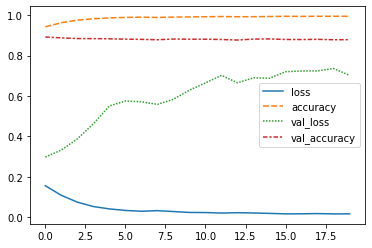

In [35]:
import seaborn as sns
sns.lineplot(data=results.history)

**Observations & Conclusions**


*   A sequential NN model has been built to iedntify the sentiment of a review
*   The final validation accuracy is 87.85%, although it saturated after few epochs
*   There is not much increase in the accuracy after a few epochs
*   the loss reduced, but the validation loss has increased which means the model is over fitting 



